C:\Users\flare\AppData\Local\Temp\ipykernel_20844\1168419961.py:28: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from current font.
  plt.tight_layout()
C:\Users\flare\AppData\Local\Temp\ipykernel_20844\1168419961.py:28: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from current font.
  plt.tight_layout()
C:\Users\flare\AppData\Local\Temp\ipykernel_20844\1168419961.py:28: UserWarning: Glyph 12468 (\N{KATAKANA LETTER GO}) missing from current font.
  plt.tight_layout()
C:\Users\flare\AppData\Local\Temp\ipykernel_20844\1168419961.py:28: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.
  plt.tight_layout()
C:\Users\flare\AppData\Local\Temp\ipykernel_20844\1168419961.py:28: UserWarning: Glyph 37117 (\N{CJK UNIFIED IDEOGRAPH-90FD}) missing from current font.
  plt.tight_layout()
C:\Users\flare\AppData\Local\Temp\ipykernel_20844\1168419961.py:28: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  plt.tig

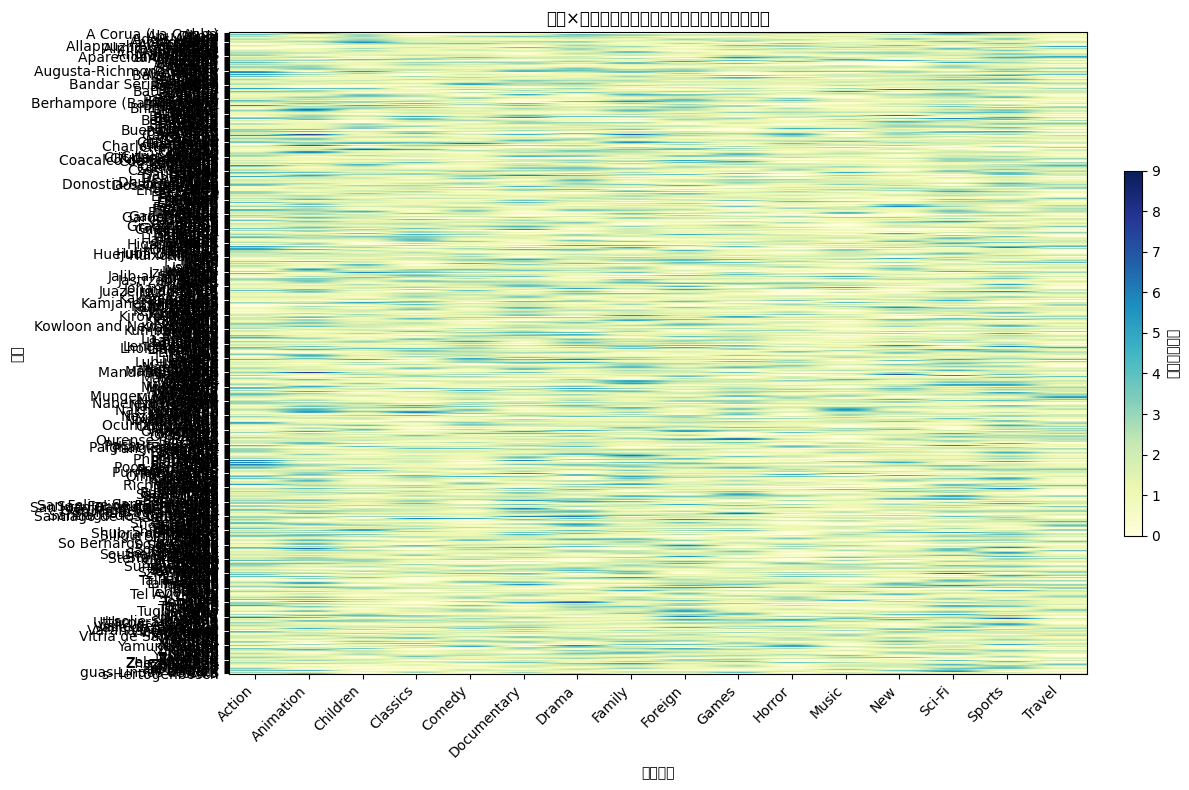

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_city_category_heatmap(csv_path="city_category_counts.csv",
                               title="都市×カテゴリ：レンタル件数（ヒートマップ）",
                               figsize=(12, 8)):
    # CSV読み込み
    df = pd.read_csv(csv_path, index_col=0)

    # 描画
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(df.values, aspect="auto", cmap="YlGnBu")

    # 軸ラベル設定
    ax.set_xticks(range(df.shape[1]))
    ax.set_yticks(range(df.shape[0]))
    ax.set_xticklabels(df.columns, rotation=45, ha="right")
    ax.set_yticklabels(df.index)

    ax.set_xlabel("カテゴリ")
    ax.set_ylabel("都市")
    ax.set_title(title)

    # カラーバー
    cbar = plt.colorbar(im, ax=ax, fraction=0.02, pad=0.04)
    cbar.set_label("レンタル件数")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_city_category_heatmap("city_category_counts.csv")


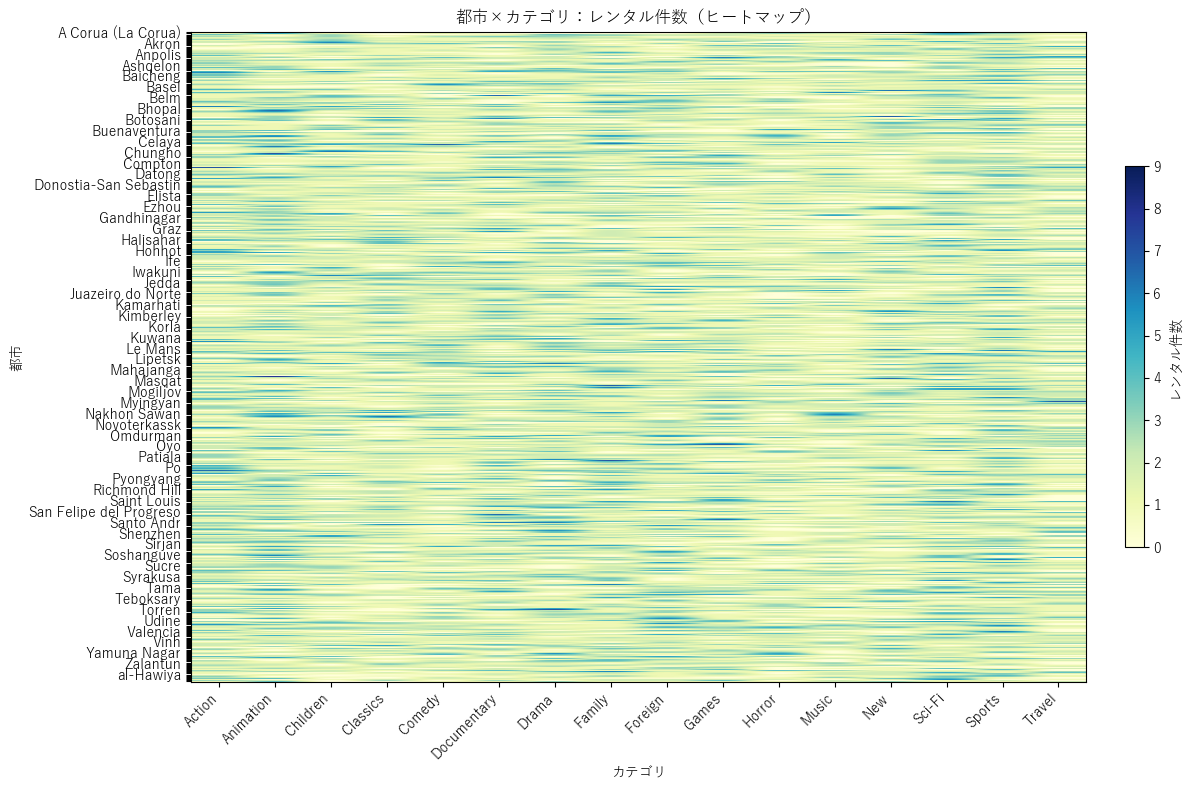

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams

def plot_city_category_heatmap(csv_path="city_category_counts.csv",
                               title="都市×カテゴリ：レンタル件数（ヒートマップ）",
                               figsize=(12, 8),
                               y_step=5):  # y_step=5 → 5行ごとに都市名を表示
    # ====== 日本語フォント設定 ======
    rcParams["axes.unicode_minus"] = False
    jp_candidates = [
        "Yu Gothic", "Meiryo", "MS Gothic",            # Windows
        "Hiragino Sans", "Hiragino Kaku Gothic ProN",  # macOS
        "Noto Sans CJK JP", "IPAGothic", "IPAexGothic" # Linux
    ]
    installed = {f.name for f in fm.fontManager.ttflist}
    for name in jp_candidates:
        if name in installed:
            rcParams["font.family"] = name
            break

    # ====== CSV読み込み ======
    df = pd.read_csv(csv_path, index_col=0)

    # ====== 描画 ======
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(df.values, aspect="auto", cmap="YlGnBu")

    # X軸カテゴリラベル
    ax.set_xticks(range(df.shape[1]))
    ax.set_xticklabels(df.columns, rotation=45, ha="right")

    # Y軸都市ラベル（間引き）
    ax.set_yticks(range(df.shape[0]))
    y_labels = [label if i % y_step == 0 else "" for i, label in enumerate(df.index)]
    ax.set_yticklabels(y_labels)

    ax.set_xlabel("カテゴリ")
    ax.set_ylabel("都市")
    ax.set_title(title)

    # カラーバー
    cbar = plt.colorbar(im, ax=ax, fraction=0.02, pad=0.04)
    cbar.set_label("レンタル件数")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # 例：都市ラベルを10行ごとに表示
    plot_city_category_heatmap("city_category_counts.csv", y_step=10)


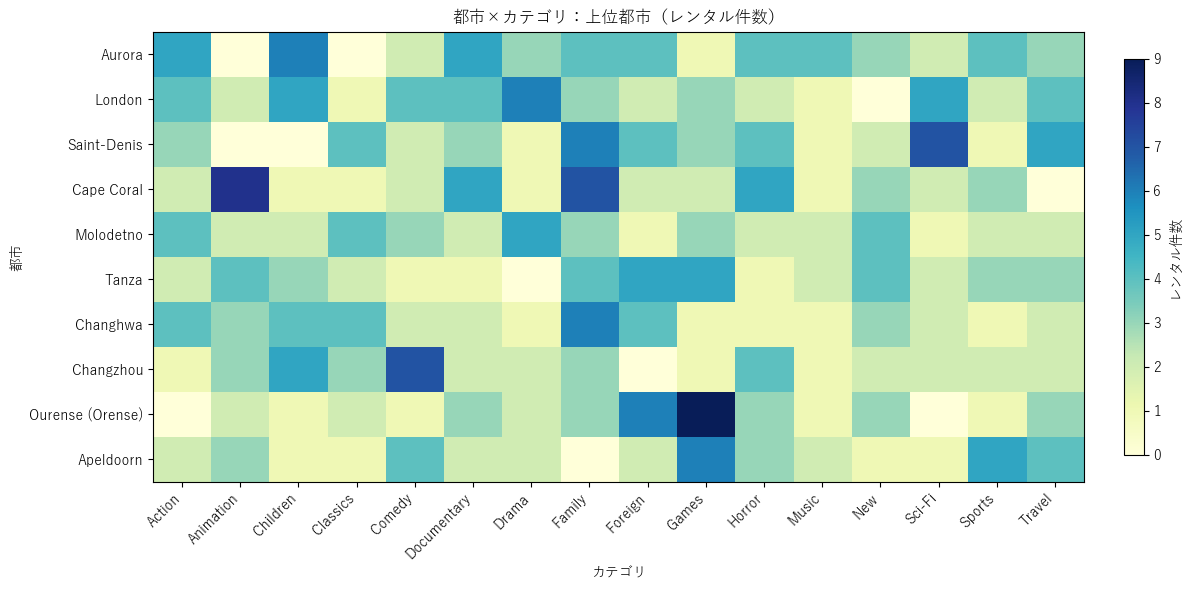

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams

def plot_city_category_topN(csv_path="city_category_counts.csv",
                            top_n=10,
                            title="都市×カテゴリ：上位都市（レンタル件数）",
                            figsize=(12, 6)):
    # ====== 日本語フォント設定 ======
    rcParams["axes.unicode_minus"] = False
    jp_candidates = [
        "Yu Gothic", "Meiryo", "MS Gothic",            # Windows
        "Hiragino Sans", "Hiragino Kaku Gothic ProN",  # macOS
        "Noto Sans CJK JP", "IPAGothic", "IPAexGothic" # Linux
    ]
    installed = {f.name for f in fm.fontManager.ttflist}
    for name in jp_candidates:
        if name in installed:
            rcParams["font.family"] = name
            break

    # ====== CSV読み込み ======
    df = pd.read_csv(csv_path, index_col=0)

    # ====== 上位N都市を抽出 ======
    top_cities = df.sum(axis=1).nlargest(top_n).index
    df_top = df.loc[top_cities]

    # ====== 描画 ======
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(df_top.values, aspect="auto", cmap="YlGnBu")

    # X軸カテゴリラベル
    ax.set_xticks(range(df_top.shape[1]))
    ax.set_xticklabels(df_top.columns, rotation=45, ha="right")

    # Y軸都市ラベル（そのまま表示）
    ax.set_yticks(range(df_top.shape[0]))
    ax.set_yticklabels(df_top.index)

    ax.set_xlabel("カテゴリ")
    ax.set_ylabel("都市")
    ax.set_title(title)

    # カラーバー
    cbar = plt.colorbar(im, ax=ax, fraction=0.02, pad=0.04)
    cbar.set_label("レンタル件数")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_city_category_topN("city_category_counts.csv", top_n=10)
